# Dataset (Corpus)

In [1]:
import pandas as pd

In [2]:
corpus = pd.read_csv('fake_and_real_news.csv')
corpus

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


# Exploring the Corpus

In [3]:
print(f"Shape of the dataset: {corpus.shape}", '\n')
print(corpus.count(), '\n')
print(f"Null Values: \n{corpus.isnull().sum()}")

Shape of the dataset: (9900, 2) 

Text     9900
label    9900
dtype: int64 

Null Values: 
Text     0
label    0
dtype: int64


### Checking for Empty Observations

In [4]:
corpus = corpus[corpus['Text'] != '']

print(f"Shape of the dataset: {corpus.shape}")

Shape of the dataset: (9900, 2)


### Checking for Class Imbalances

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

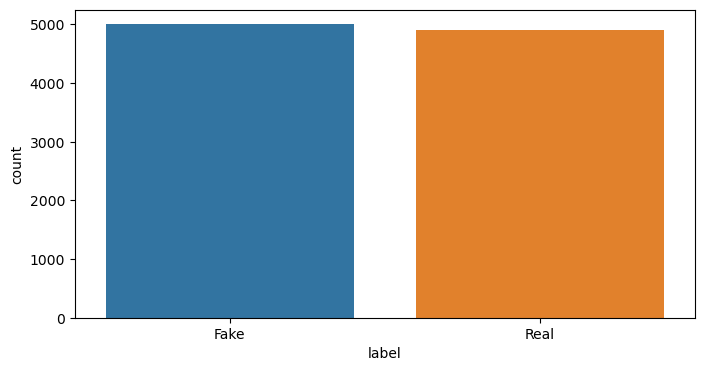

In [6]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=corpus)

### Corpus Word Cloud 

In [7]:
from wordcloud import WordCloud

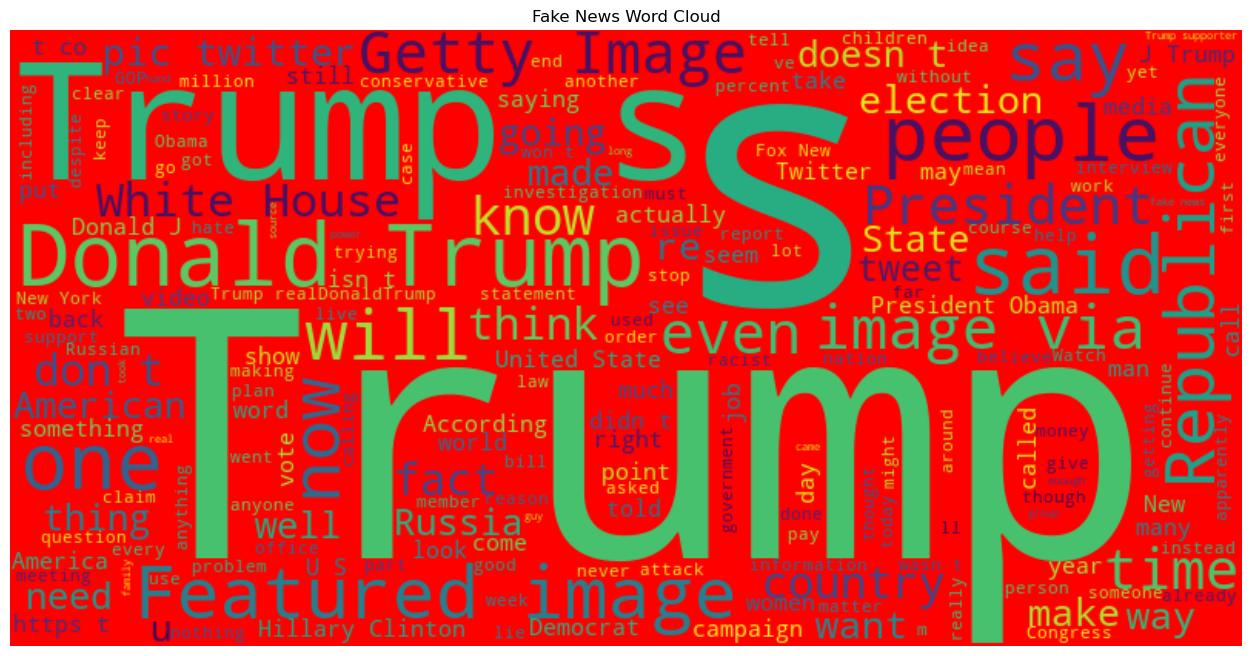

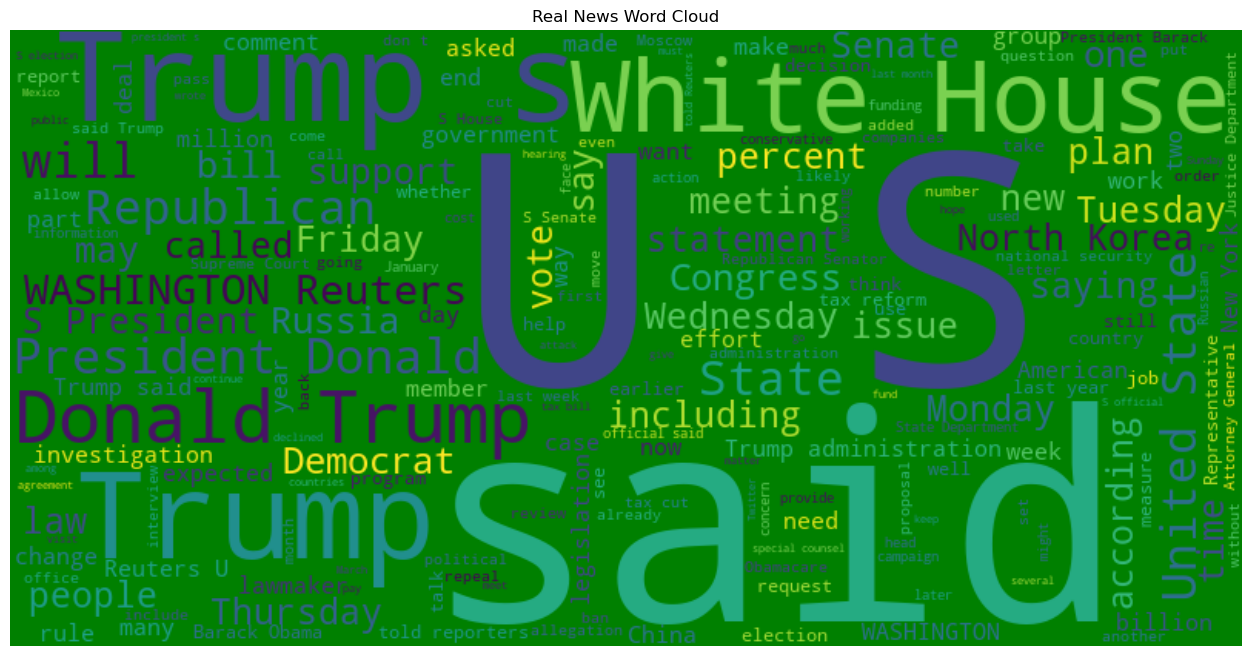

In [8]:
fake_news = ' '.join(corpus[corpus['label'] == 'Fake']['Text'])
real_news = ' '.join(corpus[corpus['label'] == 'Real']['Text'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='red').generate(fake_news)
wordcloud_real = WordCloud(width=800, height=400, background_color='green').generate(real_news)

# Plot word cloud for fake news
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')
plt.show()

# Plot word cloud for real news
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News Word Cloud')
plt.axis('off')
plt.show()

# Data Preprocessing

In [9]:
corpus['Text'] = corpus['Text'].str.strip()
corpus['Text'] = corpus['Text'].str.replace(r'[^a-zA-Z]', ' ', regex=True)
corpus['Text'] = corpus['Text'].str.lower()

### Removing stop-words

In [10]:
from nltk.corpus import stopwords

In [ ]:
# Download if not already downloaded
nltk.download('stopwords')

In [11]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

corpus['Text'] = corpus['Text'].apply(remove_stopwords)
corpus

,Text,label
0,top trump surrogate brutally stabs back pathet...,Fake
1,u conservative leader optimistic common ground...,Real
2,trump proposes u tax overhaul stirs concerns d...,Real
3,court forces ohio allow millions illegally pur...,Fake
4,democrats say trump agrees work immigration bi...,Real
...,...,...
9895,wikileaks admits screwing immensely twitter po...,Fake
9896,trump consults republican senators fed chief c...,Real
9897,trump lawyers say judge lacks jurisdiction def...,Real
9898,watch right wing pastor falsely credits trump ...,Fake


### Text Lemmatization

In [ ]:
# Download if not already downloaded
nltk.download('wordnet')

In [12]:
from nltk.stem import WordNetLemmatizer

In [13]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_words)

corpus['Text'] = corpus['Text'].apply(lemmatize_text)
corpus

,Text,label
0,top trump surrogate brutally stab back patheti...,Fake
1,u conservative leader optimistic common ground...,Real
2,trump proposes u tax overhaul stir concern def...,Real
3,court force ohio allow million illegally purge...,Fake
4,democrat say trump agrees work immigration bil...,Real
...,...,...
9895,wikileaks admits screwing immensely twitter po...,Fake
9896,trump consults republican senator fed chief ca...,Real
9897,trump lawyer say judge lack jurisdiction defam...,Real
9898,watch right wing pastor falsely credit trump s...,Fake


In [14]:
corpus['label'] = corpus['label'].map({'Fake': 0, 'Real': 1})
corpus

,Text,label
0,top trump surrogate brutally stab back patheti...,0
1,u conservative leader optimistic common ground...,1
2,trump proposes u tax overhaul stir concern def...,1
3,court force ohio allow million illegally purge...,0
4,democrat say trump agrees work immigration bil...,1
...,...,...
9895,wikileaks admits screwing immensely twitter po...,0
9896,trump consults republican senator fed chief ca...,1
9897,trump lawyer say judge lack jurisdiction defam...,1
9898,watch right wing pastor falsely credit trump s...,0


# Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = corpus['Text']
y = corpus['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the SVM model

In [19]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

SVC()

### perform predictions on the test set

In [20]:
y_pred = svm_model.predict(X_test_tfidf)

# Display actual labels and predicted labels side-by-side
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
8432,0,0
5680,1,1
4767,1,1
9218,1,1
621,0,0
...,...,...
9500,1,1
5858,1,1
7442,0,0
2846,1,1


# Calculate Accuracy

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .3f}')

Accuracy:  0.995
